In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import qutip

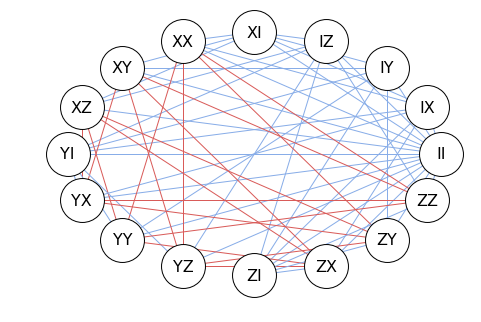

In [9]:
matrices = ['I', 'X', 'Y', 'Z']
G=nx.Graph()
for m1 in matrices:
    for m2 in matrices:
        G.add_node(m1 + m2)
        
matrices = [('I', qutip.identity(2)), ('X', qutip.sigmax()), ('Y', qutip.sigmay()), ('Z', qutip.sigmaz())]

colors = []
for m1 in matrices:
    for m2 in matrices:
        src = m1[0] + m2[0]
        for m3 in matrices:
            for m4 in matrices:
                dst = m3[0] + m4[0]
                if src != dst:
                    if qutip.commutator(qutip.tensor(m1[1], m2[1]), qutip.tensor(m3[1], m4[1])).norm() == 0:
                        if qutip.commutator(m1[1], m3[1]).norm() == 0 and qutip.commutator(m2[1], m4[1]).norm() == 0:
                            G.add_edge(src, dst, color='#88ade8')
                        else:
                            G.add_edge(src, dst, color='#d95b59')
                            
colors = [edge[2]['color'] for edge in G.edges(data=True)]

nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=16, node_color='#ffffff', node_size=1930, edge_color=colors)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
plt.savefig("two_qubit_pauli_graph.svg")